In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

import trendfilterpy as tfpy
from trendfilterpy import GammaDistribution, LogLink
from trendfilterpy._estimator import TrendFilterRegression

rng = np.random.default_rng()

In [28]:
n = 3
X = rng.integers(-100, 100, size=(n, 1)) / 100
true_y = np.square(X[:, 0])
obs_y = true_y

In [29]:
model = TrendFilterRegression(dist=tfpy.GammaDistribution, link=tfpy.LogLink, lam=0)
model.fit(X, obs_y)

TrendFilterRegression(dist=<class 'trendfilterpy._dists.GammaDistribution'>,
                      lam=0, link=<class 'trendfilterpy._links.LogLink'>)

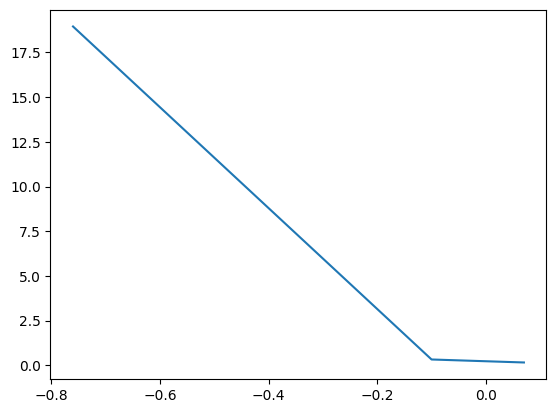

In [44]:
plt.plot(model.vars_[0].unique_vals, model.vars_[0].beta)

In [30]:
def tweedie_deviance(y, mu, p=1.5):
    return 2 * y ** (2 - p) / ((1 - p) * (2 - p)) - (y * mu ** (1 - p) / (1 - p)) + mu ** (2 - p) / (2 - p)